In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.datasets import get_rdataset

In [2]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ##
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=16)               ## 
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ## 
#############################################

## Task1

In [57]:
sunspot = get_rdataset("sunspots").data
sunspot.index=pd.date_range("1749","1984", freq="M")
df=sunspot[["value"]]

In [51]:
 df

,value
1749-01-31,58.0
1749-02-28,62.6
1749-03-31,70.0
1749-04-30,55.7
1749-05-31,85.0
...,...
1983-08-31,71.8
1983-09-30,50.3
1983-10-31,55.8
1983-11-30,33.3


In [58]:
df_non_index=df.copy().reset_index()
df_non_index.rename(columns={"index":"Date"},inplace=True)

In [53]:
df_non_index

,Date,value
0,1749-01-31,58.0
1,1749-02-28,62.6
2,1749-03-31,70.0
3,1749-04-30,55.7
4,1749-05-31,85.0
...,...,...
2815,1983-08-31,71.8
2816,1983-09-30,50.3
2817,1983-10-31,55.8
2818,1983-11-30,33.3


In [59]:
df_non_index["Year"]=df_non_index.Date.dt.month

In [60]:
df_non_index

,Date,value,Year
0,1749-01-31,58.0,1
1,1749-02-28,62.6,2
2,1749-03-31,70.0,3
3,1749-04-30,55.7,4
4,1749-05-31,85.0,5
...,...,...,...
2815,1983-08-31,71.8,8
2816,1983-09-30,50.3,9
2817,1983-10-31,55.8,10
2818,1983-11-30,33.3,11


<Axes: xlabel='Year', ylabel='value'>

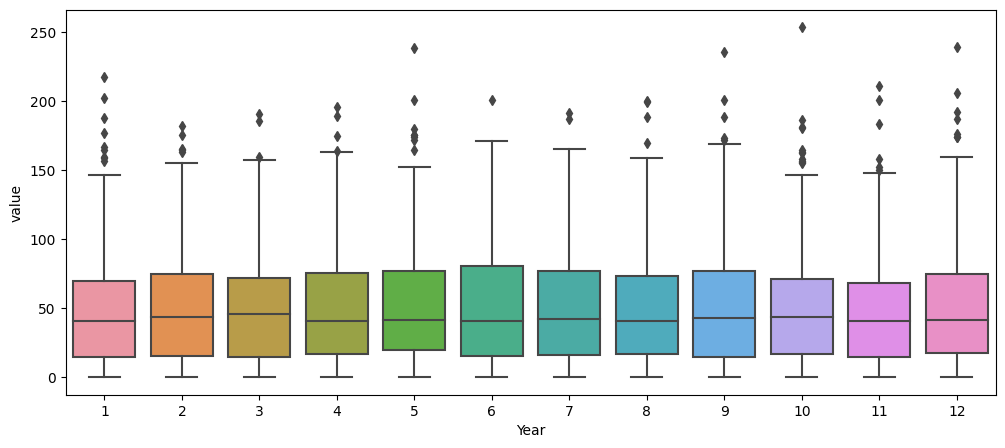

In [61]:
sns.boxplot(x=df_non_index["Year"],y=df_non_index["value"])

In [5]:
df.index

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='M')

In [6]:
df.isnull().sum()

value    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 1749-01-31 to 1983-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   2820 non-null   float64
dtypes: float64(1)
memory usage: 44.1 KB


**outlier detection**

Text(0.5, 1.0, 'Monthly Sunspot Numbers')

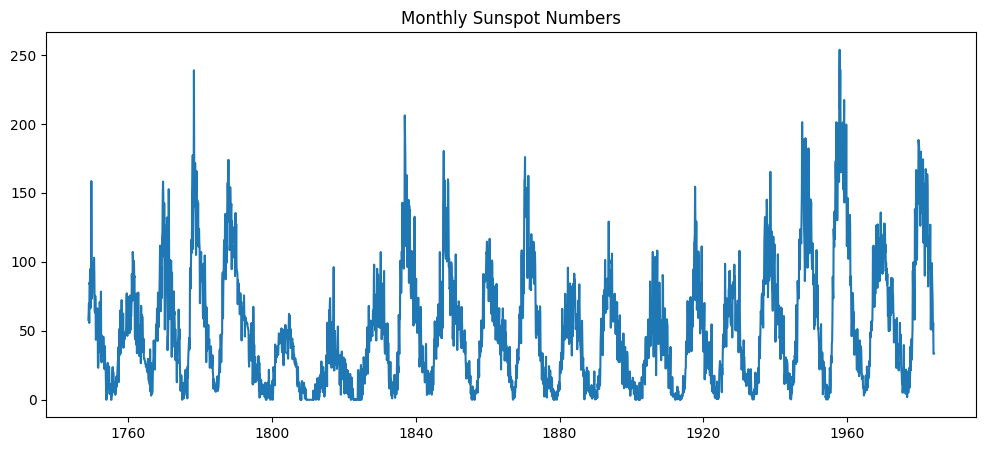

In [8]:
plt.plot(df)
plt.title("Monthly Sunspot Numbers")

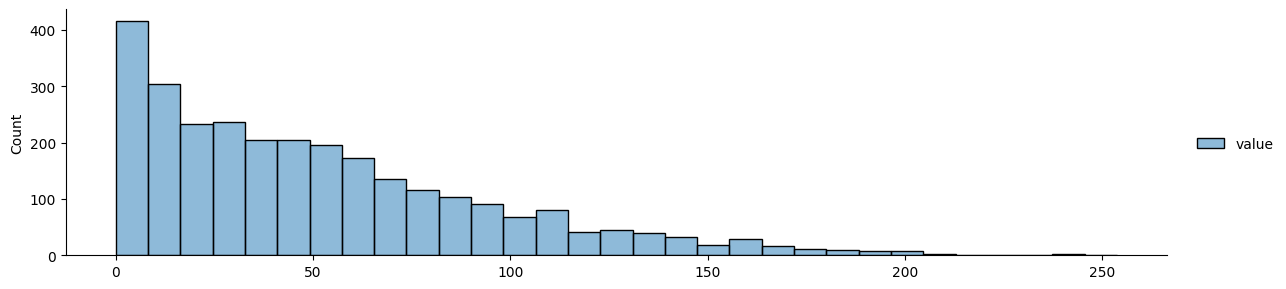

In [9]:
sns.displot(df, kind='hist', height=3, aspect=4)

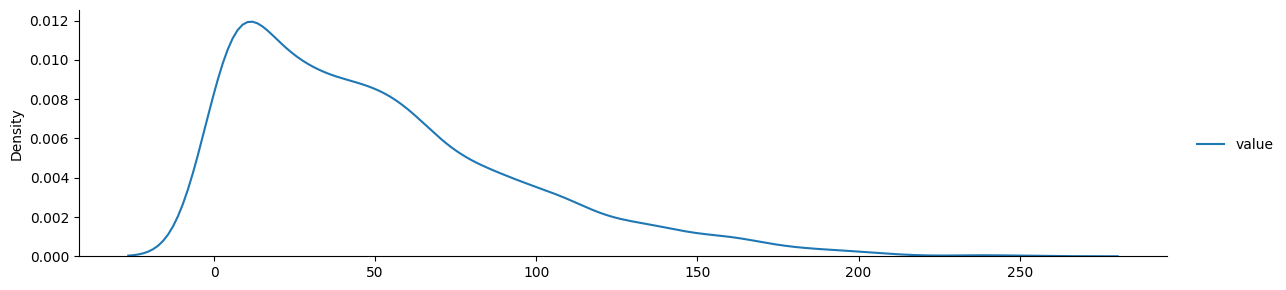

In [10]:
sns.displot(df, kind='kde', height=3, aspect=4)

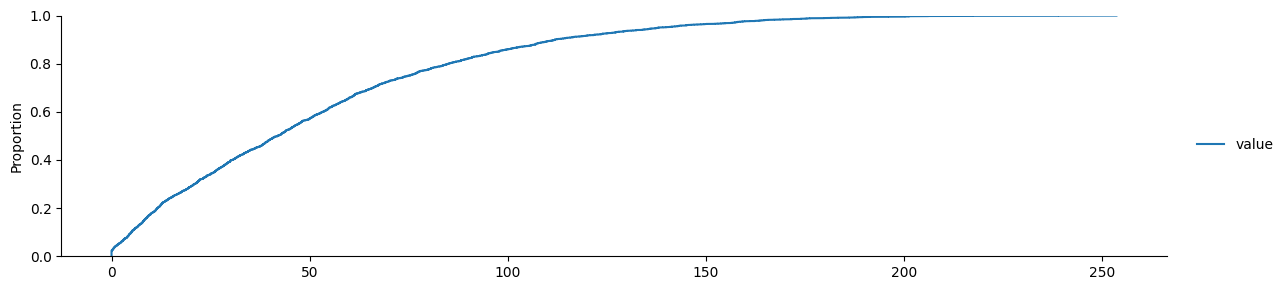

In [11]:
sns.displot(df, kind='ecdf', height=3, aspect=4)

**outlier using boxplot**

<Axes: xlabel='value'>

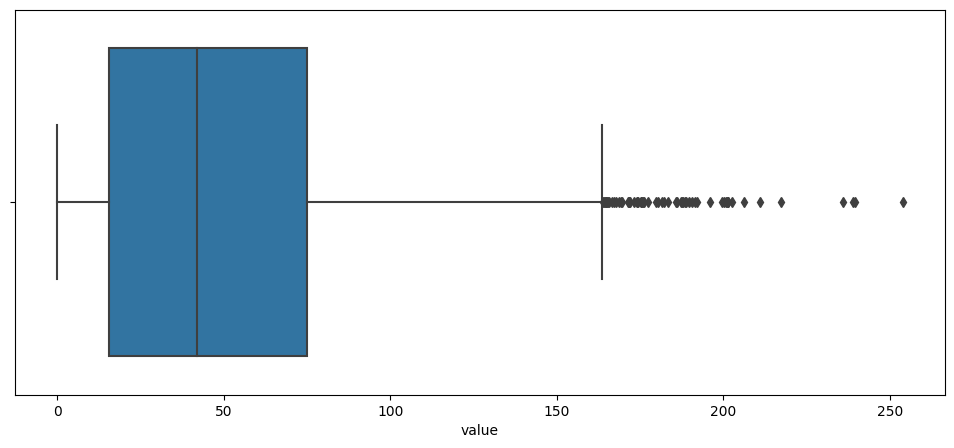

In [12]:
sns.boxplot(x=df['value'], whis=1.5)

<Axes: xlabel='value'>

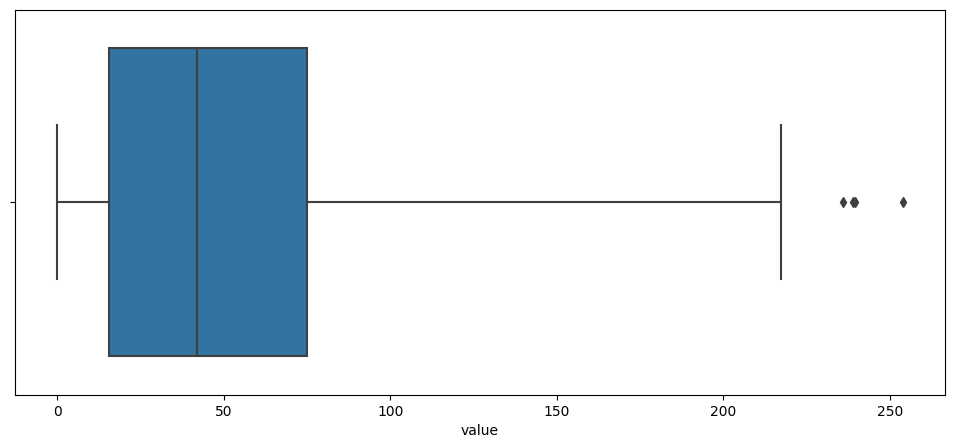

In [13]:
sns.boxplot(x=df['value'], whis=2.5)

In [14]:
def iqr_outliers(data,p):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_fence = q1 - (p * IQR)
    upper_fence = q3 + (p * IQR)
    return data[(data.value > upper_fence) | (data.value < lower_fence)]

In [15]:
for p in [ 2.0, 2.5,  3.0]:
    print(f'with p={p}')
    print(iqr_outliers(df, p))
    print('-'*25)

with p=2.0
            value
1778-05-31  238.9
1836-12-31  206.2
1947-05-31  201.3
1956-11-30  201.3
1957-06-30  200.7
1957-09-30  235.8
1957-10-31  253.8
1957-11-30  210.9
1957-12-31  239.4
1958-01-31  202.5
1958-04-30  196.0
1958-08-31  200.2
1958-09-30  201.2
1959-01-31  217.4
1959-08-31  199.6
-------------------------
with p=2.5
            value
1778-05-31  238.9
1957-09-30  235.8
1957-10-31  253.8
1957-12-31  239.4
-------------------------
with p=3.0
            value
1957-10-31  253.8
-------------------------


**outlier using z score**

In [16]:
def zscore(df, degree=3):
    data = df.copy()
    data['zscore'] = (data - data.mean())/data.std()
    outliers = data[(data['zscore'] <= -degree) | (data['zscore'] >= degree)]
    
    return outliers, data

In [17]:
def plot_outlier(outliers,data):
    plt.plot(data["value"])
    plt.plot(outliers["value"],"rx")
    plt.show()

In [18]:
outliers, transformed = zscore(df)

array([[<Axes: title={'center': 'value'}>,
        <Axes: title={'center': 'zscore'}>]], dtype=object)

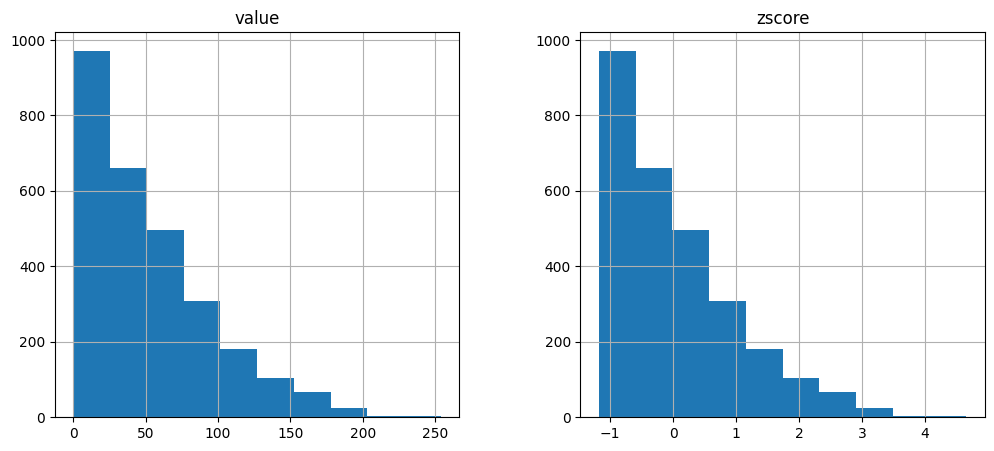

In [19]:
transformed.hist()

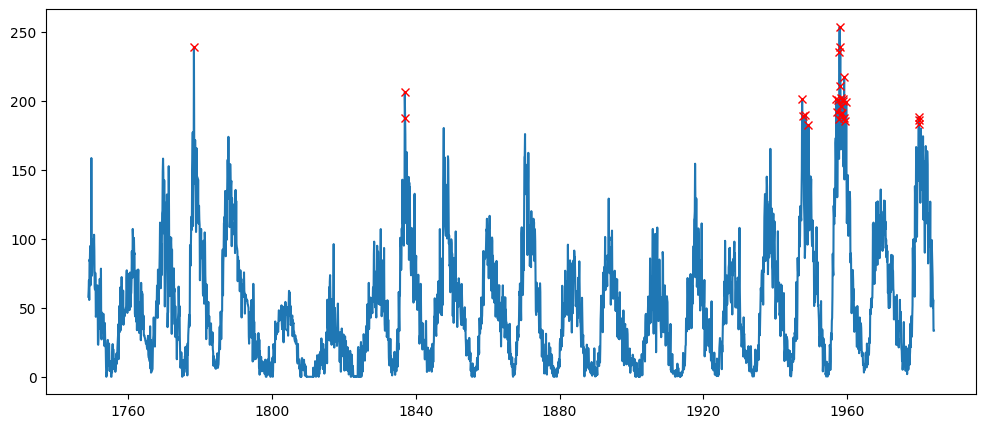

In [20]:
plot_outlier(outliers,transformed)

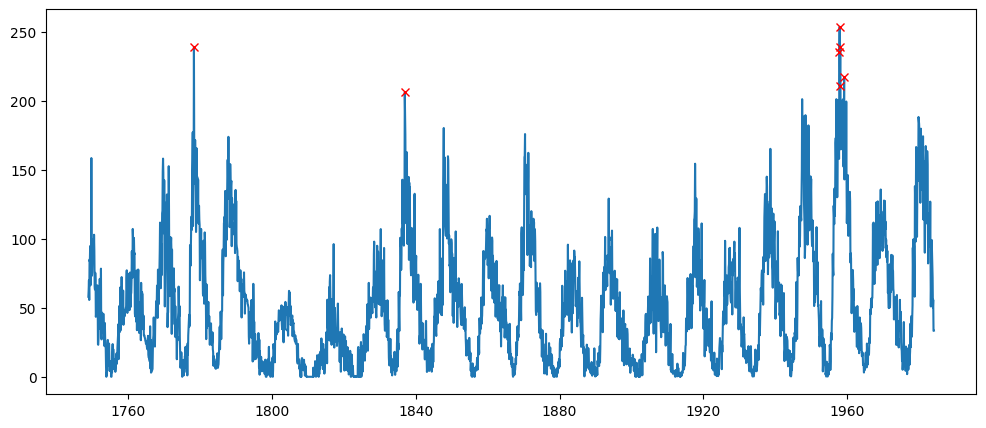

In [21]:
outliers, transformed = zscore(df,3.5)
plot_outlier(outliers,transformed)

In [22]:
outliers

,value,zscore
1778-05-31,238.9,4.318492
1836-12-31,206.2,3.565885
1957-09-30,235.8,4.247144
1957-10-31,253.8,4.661423
1957-11-30,210.9,3.674058
1957-12-31,239.4,4.330000
1959-01-31,217.4,3.823659


In [23]:
outliers.index

DatetimeIndex(['1778-05-31', '1836-12-31', '1957-09-30', '1957-10-31',
               '1957-11-30', '1957-12-31', '1959-01-31'],
              dtype='datetime64[ns]', freq=None)

In [24]:
removed_outlier_df=df.drop(outliers.index)

In [25]:
removed_outlier_df

,value
1749-01-31,58.0
1749-02-28,62.6
1749-03-31,70.0
1749-04-30,55.7
1749-05-31,85.0
...,...
1983-08-31,71.8
1983-09-30,50.3
1983-10-31,55.8
1983-11-30,33.3


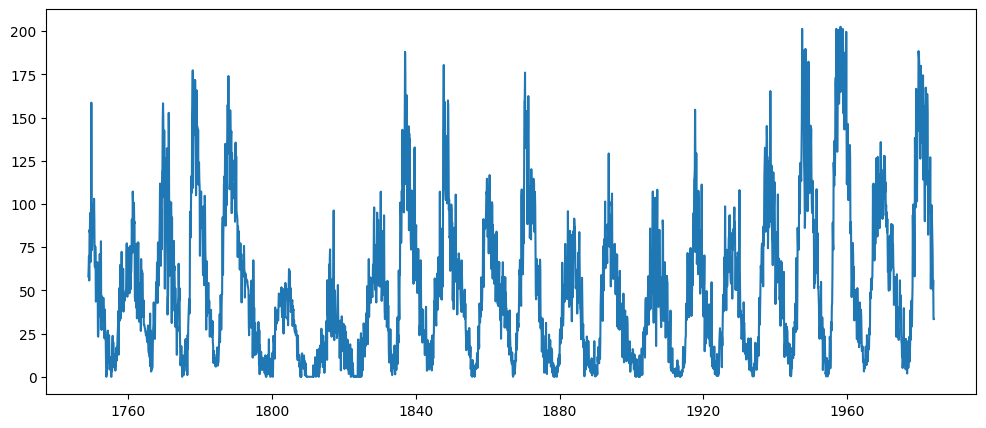

In [62]:
plt.plot(removed_outlier_df)

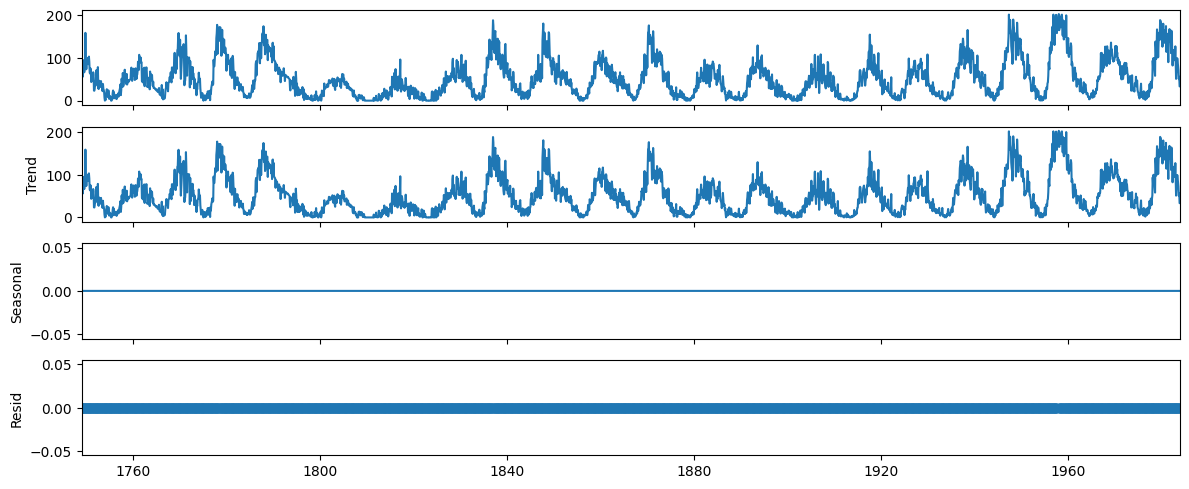

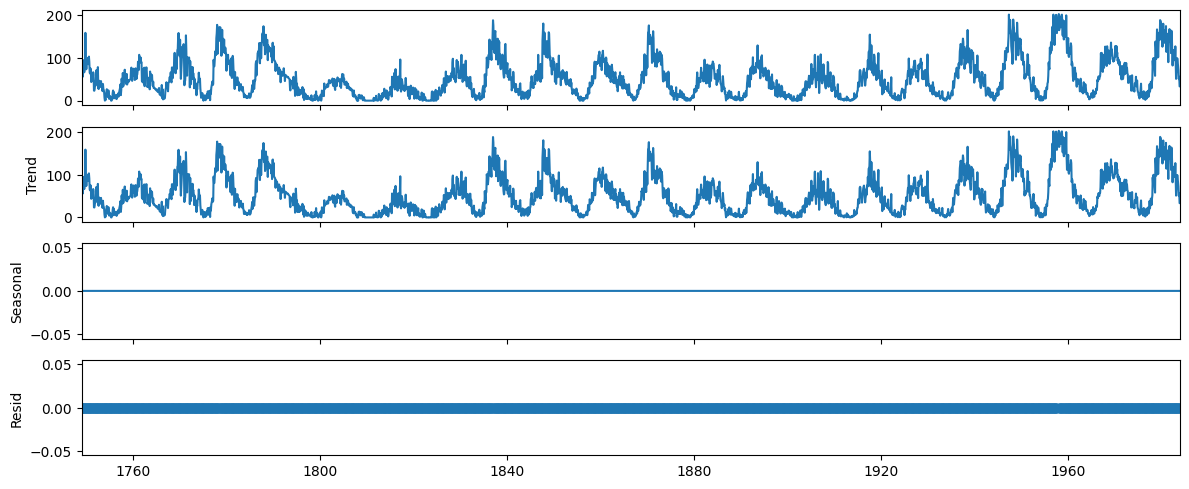

In [65]:
df_20_decomposed = seasonal_decompose(removed_outlier_df,model='additive',period=1)
df_20_decomposed.plot()